<h2 align="center"> Zoo Animal Classification/Avance II </h2>
<h2 align="center"> Equipo1. Grupo: 001, Lunes-Miércoles-Viernes/6:00p.m.-7:00p.m. </h2>
<h2>Integrantes:</h2>
<ul style="list-style-type:circle;">
  <li>1884110, Garcia Villarreal Lizeth Guadalupe</li>
  <li>1884095, Mata Monsiváis Angel Alfonso</li>
  <li>1739252, Ontiveros Castillo Emmanuel</li>
</ul> 

## Objetivos Generales.

- El objetivo general de este proyecto de minería de datos es la recuperación, análisis y comparación de conocimiento por medio de árboles de decisiones que se busca clasificar a animales por medio de sus características morfológicas.

## Motivación.

- El reino animal, con su infinidad de formas, características y cualidades es un área que ha sido de gran interés para diferentes ciencias durante la historia de la humanidad. Sinembargo es a la vez un lugar al cual queda mucho por conocer. Por tal motivo, por medio de este proyecto se intentará realizar clasificaciones de animales que van más allá de lo obvio. A través del análisis de árboles de decisiones, pretende lograr obtención de información no tan obvia, es decir, características de animales las cuales tienen en común una o varias especies de forma transversal, las cuales serán analizadas a fondo a medida que el informe prosigue.


## Preguntas de interés.


- ¿Cuáles son las características principales que permiten clasificar un animal dentro de una determinada especie u otra?

In [29]:
#Importar librerías
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas_profiling
from matplotlib.colors import ListedColormap

## 1. Lectura y limpieza de datos.

* Cargar datos de tabla Zoo y tabla Clases en su respectivo data frame para su manipulación. El data frame zoo contiene las características de los animales. El data frame zooClas contiene las clases (1: Mammal, 2: Bird, 3: Reptile, 4: Fish, 5: Amphibian, 6: Bug, 7: Invertebrate) a las que pertenecen los animales.


In [30]:
#Primera tabla.
zoo = pd.read_csv('/home/mata/Documentos/Escuela/Mineria/proyecto/zoo-animal-classification/zoo.csv')
#Segunda tabla.
zooClass = pd.read_csv('/home/mata/Documentos/Escuela/Mineria/proyecto/zoo-animal-classification/class.csv')

* Encabezado de Zoo (Primera tabla), visualización previa. Se puede observar que los valores que contiene son en binario (1,0) verdadero o falso, a excepción de dos columnas las cuales son legs que contienen el número de piernas del animal, y class_type que contiene el número de la clase de animal que pertenece haciendo referencia al segundo data frame zooClass.


In [3]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


* Verificación de valores de la tabla Zoo y valores nulos.

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


* Verificación de la suma de los valores nulos que contenga.

In [5]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

_No hay valores nulos en este data frame de zoo._

* Verificación en busca de animales duplicados de la columna animal_name de la tabla Zoo.

In [6]:
duplicates = zoo.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

_Aparece frog repetido dos veces._

* Se mostrará a continuación estos duplicados de frog para ver la semejanza que hay en sus características para tomarse una decisión.

In [7]:
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


_Se encontró en sus características que una frog es venenosa y otra no. Por tal solo se cambiara el nombre par distinguir._

* Se nombró distinto las 2 tipos de frog poniendo la que es venenosa como venoumos_frog en la columa animal_name.

In [8]:
zoo['animal_name'][(zoo.venomous == 1 )& (zoo.animal_name == 'frog')] = 'venoumous_frog'

/home/mata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


* Comprobación de estas frog nuevamente.

In [9]:
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


In [10]:
venoumous_frog = zoo.loc[zoo['animal_name'] == 'venoumous_frog']
venoumous_frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
26,venoumous_frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


* Como se menciona anteriormente, legs es el único que no está en binario así que se verá que valores numéricos tiene.

In [11]:
print(zoo.legs.unique())

[4 0 2 6 8 5]


_Es curioso que haya animales con 5 piernas así que veremos de cuáles se trata._

In [12]:
zoo.loc[zoo['legs'] == 5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


_Una estrella de mas con 5 puntas como piernas parece valido._

* Encabezado de clases, visualización previa (Segunda tabla).

In [25]:
zooClass

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


* Verificando valores de tabla class.

In [14]:
zooClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


## 2. Estadistica

#### Se hace necesario aclarar algunas asociaciones implícitas que no son completamente claras al momento de utilizar técnicas de estadística descriptiva tales como moda, media, medidas de dispersión, etc.

* Veremos la descripción de zoo aunque no es importante ya que son solo valores binarios de cierto y falso.

In [15]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## 3. Graficas

* Resumen de anmal_type.  

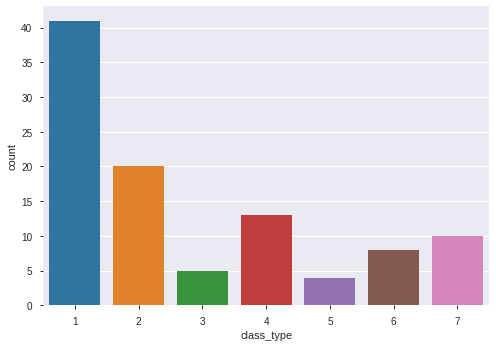

In [16]:
sns.countplot(zoo['class_type'])

_Se ve la sumatoria de animales que pertenecen a cada clase. Visualmente uno se percata de que hay más Mammal que las demás clases. Esto tal vez puede influir en que las asociaciones más frecuentes están relacionadas a los mamíferos._

* Con un mapa de calor se podrá mostrar correlaciones de Zoo con todas las semejanzas de las características de los animales.

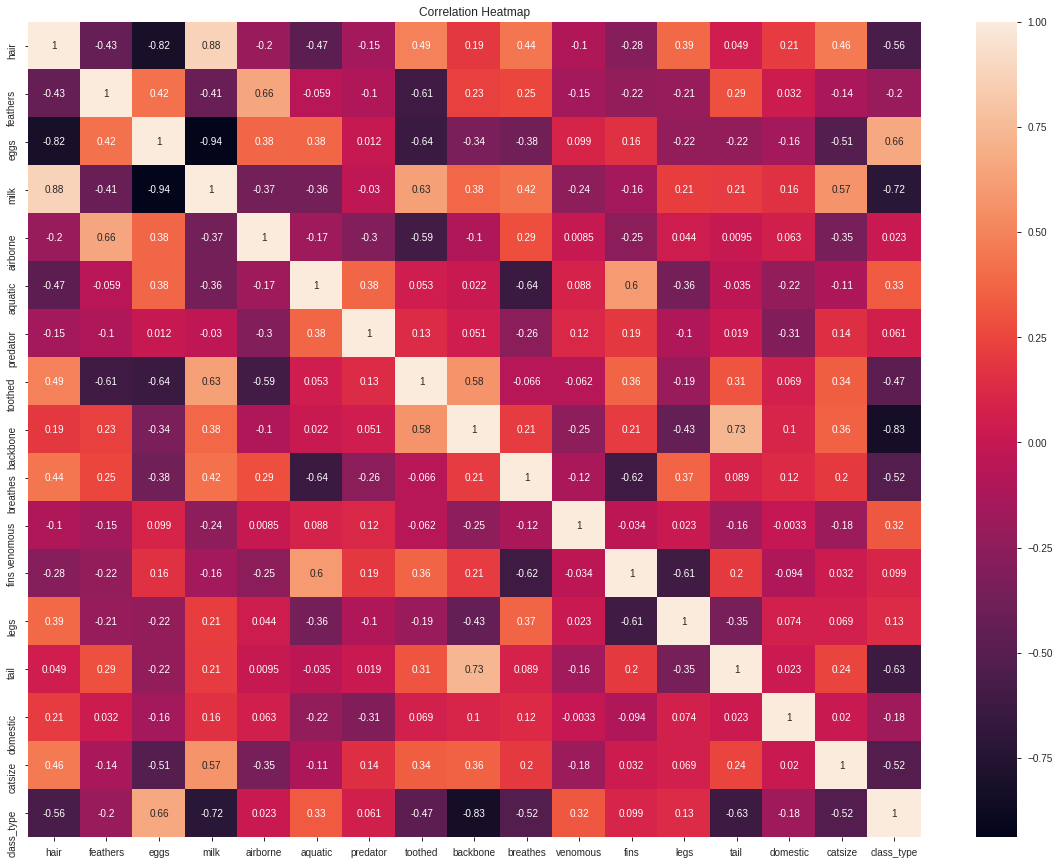

In [18]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = zoo.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

_Se observa que animales con hair un gran número no pone huevos. Animales que ponen huevos no tienen leche. Características tales como pelaje, número de patas o la capacidad de amamantar son concluyentes al momento de la clasificación de animales dentro de las especies pertenecientes._

* Unión de ambos data frame de zoo y zooClass para tener una sola tabla y tener mas optima y concreta la información con los cambios hechos anteriormente como la corrección de la rana venenosa y la rana.

In [19]:
unir = pd.merge(zoo,zooClass,how='left',left_on='class_type',right_on='Class_Number')
unir.head(100)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,0,1,1,0,1,0,1,0,1,...,0,2,1,0,1,2,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


* Guardado de el data frame de la unión en un .cvs para su manipulación.

In [20]:
header = ['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','class_type','Class_Number','Number_Of_Animal_Species_In_Class','Class_Type','Animal_Names']
unir.to_csv('zooAndClass.csv',columns = header, index=False)
lol = pd.read_csv('zooAndClass.csv')
lol

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,7,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


* Apreciación mucho mejor de lo que se tiene realmente en la base de datos ya que los dos data están juntos.

/home/mata/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/mata/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


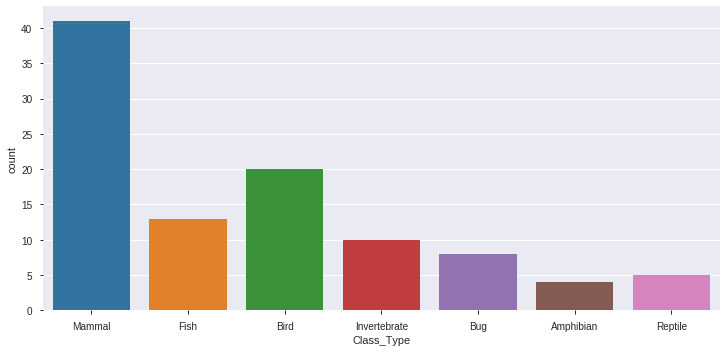

In [21]:
sns.factorplot('Class_Type', data=lol, kind="count",size = 5,aspect = 2)

-¿Las asociaciones más frecuentes están relacionadas a los mamíferos? o ¿Las asociaciones menos frecuentes están relacionadas a los reptiles?. Estas preguntas es algo que contestaremos cuando la pregunta de interés se resuelva en su momento._

### Conclusión.

Quizás el problema principal planteado radica en encontrar la técnica adecuada dentro de la base de datos ZOO, esto es para poder determinar patrones entre los datos que permitan las agrupaciones de especies según sus características morfológicas, y así afirmar y avalar las hipótesis demostradas de clasificaciones de animales en las preguntas de interés:

* ¿Las asociaciones más frecuentes están relacionadas a los mamíferos?.
* ¿Las características más concluyentes son referentes a la agrupación de animales para las especies “mamíferos”, “aves” y “ peces”?.
* ¿Características tales como pelaje, número de patas o la capacidad de amamantar son concluyentes al momento de la clasificación de animales dentro de la especie “mamíferos”.
